In [1]:
cd ..

/Users/charlesp/Documents/Projects/hacker_news_NLP_score_prediction/predict


In [2]:
from process import Process

In [3]:
p = Process()

INFO:root:Creating connection to hn_db...
INFO:root:Successfully connected.
INFO:root:Retrieved posts from database
INFO:root:Closing DB Connection.


In [4]:
p.posts.head()

,id,title,url,type,score,timestamp
0,3676512,New iPad is official: 2048x1536 retina display,http://www.engadget.com/2012/03/07/the-new-ipa...,story,18,2012-03-07 18:28:01
1,22034463,The Art of Problem-Solving,https://amymhaddad.com/the-art-of-problem-solving,story,2,2020-01-13 13:57:43
2,752581,Twitter is for Old People,http://crenk.com/twitter-is-for-old-people/,story,1,2009-08-10 11:37:22
3,8176404,President Obama: No Internet Fast Lanes,http://www.nytimes.com/2014/08/14/opinion/pres...,story,2,2014-08-14 07:18:32
4,8160475,Free Photo Editing Software Lets You Manipulat...,http://reframe.gizmodo.com/free-photo-editing-...,story,2,2014-08-10 19:32:42


In [5]:
p.posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509434 entries, 0 to 3509433
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   id         Int64         
 1   title      string        
 2   url        string        
 3   type       string        
 4   score      Int64         
 5   timestamp  datetime64[ns]
dtypes: Int64(2), datetime64[ns](1), string(3)
memory usage: 167.3 MB


## What's The Average Length Of A Post ?
This will inform our custom initialization of the model's block size.

In [13]:
p.posts['len'] = p.posts.title.str.len()

In [14]:
p.posts.head()

,id,title,url,type,score,timestamp,len
0,3676512,New iPad is official: 2048x1536 retina display,http://www.engadget.com/2012/03/07/the-new-ipa...,story,18,2012-03-07 18:28:01,46
1,22034463,The Art of Problem-Solving,https://amymhaddad.com/the-art-of-problem-solving,story,2,2020-01-13 13:57:43,26
2,752581,Twitter is for Old People,http://crenk.com/twitter-is-for-old-people/,story,1,2009-08-10 11:37:22,25
3,8176404,President Obama: No Internet Fast Lanes,http://www.nytimes.com/2014/08/14/opinion/pres...,story,2,2014-08-14 07:18:32,39
4,8160475,Free Photo Editing Software Lets You Manipulat...,http://reframe.gizmodo.com/free-photo-editing-...,story,2,2014-08-10 19:32:42,61


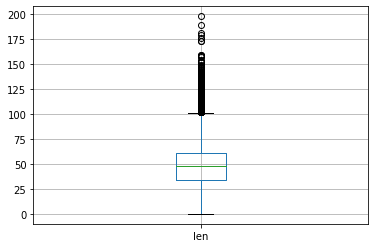

In [16]:
p.posts.boxplot(column ='len')

In [23]:
# % of posts less than 50 words
p.posts[p.posts.title.str.len() <= 50].shape[0] / len(p.posts) * 100 

55.337099942611836

In [27]:
# % of posts less than 75 words
p.posts[p.posts.title.str.len() <= 75].shape[0] / len(p.posts) * 100 

93.6755043690806